In [340]:
#Name: Ritika Munshi
#UID: 118345048

In [341]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.model_selection import cross_val_score

In [342]:
data = pd.read_csv("08_gap-every-five-years.tsv", sep='\t')
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


# Part 1: Regression analysis of Gapminder data

#### Exercise 1: Make a scatter plot of life expectancy across time.

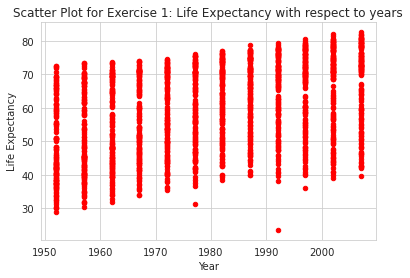

In [343]:
df = pd.DataFrame(data,columns=['year','lifeExp'])
df.plot(x ='year', y='lifeExp', kind = 'scatter', color = "red")
plt.title('Scatter Plot for Exercise 1: Life Expectancy with respect to years')
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.show()

#### Question 1: Is there a general trend (e.g., increasing or decreasing) for life expectancy across time? Is this trend linear?

In [344]:
dataset = data.sort_values(by=['year'], ascending=True)

In [345]:
years = []
for index, row in dataset.iterrows():
    if row[2] not in years:
        years.append(row[2])
    else:
        pass

In [346]:
expectancies = []

for yr in years:
    temp = []
    for index, row in dataset.iterrows():
        if yr == row[2]:
            temp.append(row[3])
        else:
            pass
    expectancies.append(temp)

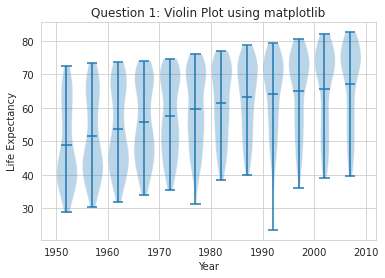

In [347]:
fig, ax = plt.subplots()

ax.violinplot(expectancies,years,widths=4,showmeans=True) #look like labels

ax.set_title('Question 1: Violin Plot using matplotlib')
ax.set_xlabel("Year")
ax.set_ylabel("Life Expectancy")
#fig.savefig("violin.png")
plt.show()

q1 = (data.groupby('year')["lifeExp"])

<AxesSubplot:xlabel='year', ylabel='lifeExp'>

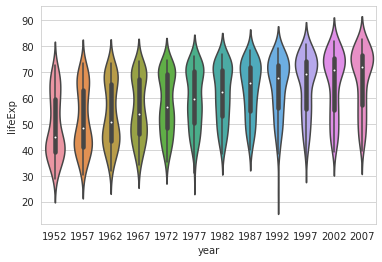

In [348]:
sns.violinplot(x='year', y='lifeExp',data=data, title='Question 1: Violin Plot using Seaborn')

In [349]:
#I believe yes the plot is linear. It is because we can observe that it is inclining with respective to growing time period or years.

#### Question 2: How would you describe the distribution of life expectancy across countries for individual years? Is it skewed, or not? Unimodal or not? Symmetric around it’s center?

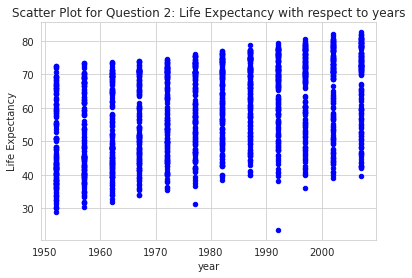

In [350]:
df = pd.DataFrame(data,columns=['year','lifeExp'])
df.plot(x ='year', y='lifeExp', kind = 'scatter', color = "blue")
plt.title('Scatter Plot for Question 2: Life Expectancy with respect to years')
plt.xlabel("year")
plt.ylabel("Life Expectancy")
plt.show()

In [351]:
dataset.loc[:,['lifeExp']].describe().T

,count,mean,std,min,25%,50%,75%,max
lifeExp,1704.0,59.474439,12.917107,23.599,48.198,60.7125,70.8455,82.603


In [352]:
dataset["lifeExp"].mode()

0    69.39
Name: lifeExp, dtype: float64

<AxesSubplot:>

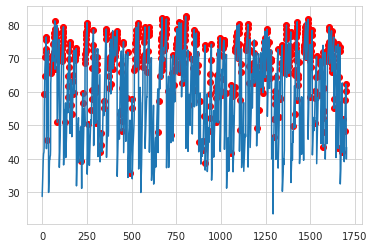

In [353]:
dataset['max'] = dataset.lifeExp[(dataset.lifeExp.shift(1) < dataset.lifeExp) & (dataset.lifeExp.shift(-1) < dataset.lifeExp)]
plt.scatter(dataset.index, dataset['max'], c='r')
df.lifeExp.plot()

In [354]:
#I believe yes, it is skewed to the left with growing years.
#I believe yes it could be said that it is a unimodal graph or unimodal distribution but with skewed distribution to the left.
#I do not think it is symmetric as normal distribution as it is skewed.

#### Question 3: Suppose I fit a linear regression model of life expectancy vs. year (treating it as a continuous variable), and test for a relationship between year and life expectancy, will you reject the null hypothesis of no relationship?

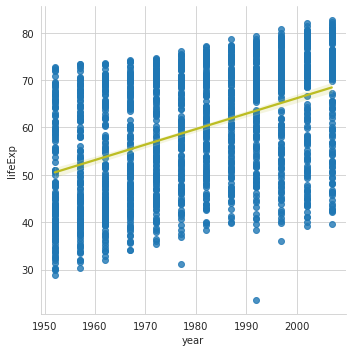

In [355]:
sns.lmplot(x='year',y='lifeExp',data=df,fit_reg=True, line_kws={"color": "C8"}) 

In [356]:
#Suppose after fitting a linear regression model of life expectancy vs. year; testing for a relationship between year and life expectancy, 
#I believe yes I would reject the null hypothesis of no relationship. 
#Suppose looking above with our scatter plot; it is because if we fit a regression line and we know that our 
#plot is skewed to the left we would see a relationship in the sense that skewed to the left and regression line would also be in 
#that direction which would show us some sort of relationship.

#### Question 4: What would a violin plot of residuals from the linear model in Question 3 vs. year look like?

<AxesSubplot:>

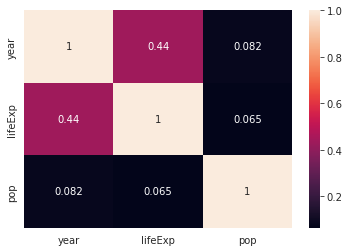

In [357]:
#Linear Regression Assumption: Multicollinearity not there: Good
sns.heatmap(dataset.iloc[:, 0:5].corr(), annot=True)

In [358]:
X = dataset.iloc[:,0:5].values
y = dataset.iloc[:,-1].values

In [359]:
#Inituitively we could have or expect some sort of relationship as we got above because residuals will not change and it will also 
#not affect the probabilities and therefore I believe the plot will also not change to higher extent and would be a quite similar.

#### Question 5: According to the assumptions of the linear regression model, what should that violin plot look like? That is, consider the assumptions the linear regression model you used assumes (e.g., about noise, about input distributions, etc); do you think everything is okay?

In [360]:
#According to the assumptions, I believe it would be linear relationship as one of the assumptions.
#It is so because we know that every data point is independent so residual will be a specific distribution.
#The distribution would be a Gaussian also known as Normal Distribution.
#Therefore, I believe the plot should look like as it is normally distributed and which also defines that we did not loose our data and 
#the plot or data points are conveying many information to explain the relationships in the data with respect to the linear regression
#model, its assumptions and our intuitions.

#### Exercise 2: Fit a linear regression model using, e.g., the LinearRegression function from Scikit-Learn or the closed-form solution, for life expectancy vs. year (as a continuous variable).

In [361]:
years = np.array(years)
expectancies = np.array(expectancies)

In [362]:
reshapeyear = years.reshape(-1,1)

In [363]:
print(reshapeyear.shape)
print(expectancies.shape)

(12, 1)
(12, 142)


In [364]:
resyear = np.repeat(reshapeyear, 142, axis=1)

In [365]:
resyear = resyear.reshape(-1,1)
expectancies = expectancies.reshape(-1,1)

In [366]:
print(resyear.shape)
print(expectancies.shape)

(1704, 1)
(1704, 1)


In [367]:
reg = LinearRegression().fit(resyear, expectancies)
print("Score is:")
reg.score(resyear, expectancies)

Score is:


0.18975713852188814

In [368]:
print("Coefficient is:")
reg.coef_

Coefficient is:


array([[0.32590383]])

In [369]:
print("Intercept is:")
reg.intercept_

Intercept is:


array([-585.65218744])

Text(0.5, 1.0, 'Scatter plot with respect with Years and Life Expectancies')

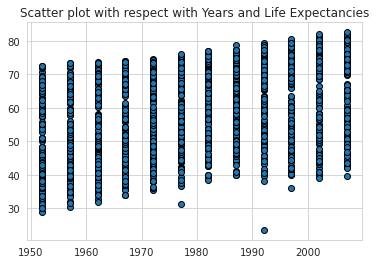

In [370]:
plt.scatter(resyear, expectancies, edgecolors="k")
plt.title("Scatter plot with respect with Years and Life Expectancies")

Text(0.5, 1.0, 'Scatter plot with respect with Years and Life Expectancies along with the predicition and regression line')

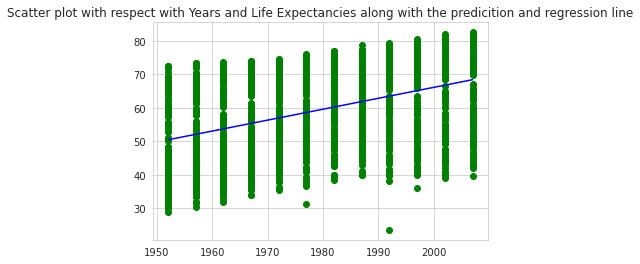

In [371]:
regressor = LinearRegression() 
regressor.fit(resyear, expectancies) 
y_pred = regressor.predict(resyear)
plt.scatter(resyear, expectancies,color='g') 
plt.plot(resyear, y_pred,color='b')
plt.title("Scatter plot with respect with Years and Life Expectancies along with the predicition and regression line")

In [372]:
models = smf.ols(formula='lifeExp ~ year', data=data).fit()

In [373]:
models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           7.55e-80
Time:                        20:06:40   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -585.6522     32.314    -18.124      0.000    -649.031    -522.273
year           0.3259      0.016     19.965      0.000       0.294       0.358
==============================================================================
Omnibus:                      386.124   Durbin-Watson:                   0.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.750
Skew:                          -0.268   Prob(JB):                     1.97e-20
Kurtosis:                       2.004   Cond. No.                     2.27e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [374]:
y_pred = regressor.predict(resyear)

In [375]:
arr = []
for x in y_pred:
    if x not in arr:
        arr.append(x)
    else:
        pass

In [376]:
predvals = []
for x in arr:
    predvals.append(x[0])

#### Question 6: On average, by how much does life expectancy increase every year around the world?

In [377]:
#I believe : according to fitting the linear regression model; we have: lifeExp = a . year
#It increases by 0.32590383 which is just the coefficient a that we computed above via our fitting a regression model.

#### Question 7: Do you reject the null hypothesis of no relationship between year and life expectancy? Why?

In [378]:
#I believe yes I would reject the null hypothesis of no relationship.
# We can see that as we fit the linear regression model, our p-value is 0 and if our p-value is less than 0.05 we can say that it is 
#significantly different from zeros and is below our threshold.
#It is also because after we fit the regression model and tried to plot with respect to years and life Expectancies, we do see a linear 
#relationship or can say a positive relationship between how scatter plot goes on and the regression line we get.

#### Exercise 3: Make a violin plot of residuals vs. year for the linear model from Exercise 2.

In [379]:
data["Residual"] = 0.0

In [380]:
for index, row in data.iterrows():    
    if row['year'] == 1952:
        #row['Residual'] = row['lifeExp'] - predvals[0]
        s = row['lifeExp'] - predvals[0]
        data._set_value(index,'Residual',s)
        #data.loc[index, "Residual"] = row['lifeExp'] - predvals[0]
    elif row['year'] == 1957:
        dats = row['lifeExp'] - predvals[1]
        data._set_value(index,'Residual',s)
    elif row['year'] == 1962:
        dats = row['lifeExp'] - predvals[2]
        data._set_value(index,'Residual',s)
    elif row['year'] == 1967:
        s = row['lifeExp'] - predvals[3]
        data._set_value(index,'Residual',s)
    elif row['year'] == 1972:
        ds = row['lifeExp'] - predvals[4]
        data._set_value(index,'Residual',s)
    elif row['year'] == 1977:
        s = row['lifeExp'] - predvals[5]
        data._set_value(index,'Residual',s)
    elif row['year'] == 1982:
        s = row['lifeExp'] - predvals[6]
        data._set_value(index,'Residual',s)
    elif row['year'] == 1987:
        s = row['lifeExp'] - predvals[7]
        data._set_value(index,'Residual',s)
    elif row['year'] == 1992:
        s = row['lifeExp'] - predvals[8]
        
        data._set_value(index,'Residual',s)
    elif row['year'] == 1997:
        s = row['lifeExp'] - predvals[9]
        data._set_value(index,'Residual',s)
    elif row['year'] == 2002:
        s = row['lifeExp'] - predvals[10]
        data._set_value(index,'Residual',s)
    elif row['year'] == 2007:
        s = row['lifeExp'] - predvals[11]
        data._set_value(index,'Residual',s)

In [381]:
newpredict3 = models.predict(data.loc[:,['year']])

In [382]:
data['newpredictex3'] = newpredict3

In [383]:
data['Ex3Residual'] = data['lifeExp'] - data['newpredictex3']

In [384]:
data.head()

,country,continent,year,lifeExp,pop,gdpPercap,Residual,newpredictex3,Ex3Residual
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,-21.711084,50.512084,-21.711084
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,-21.711084,52.141603,-21.809603
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,-21.711084,53.771122,-21.774122
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,-21.380642,55.400642,-21.380642
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,-21.380642,57.030161,-20.942161


<AxesSubplot:xlabel='year', ylabel='Ex3Residual'>

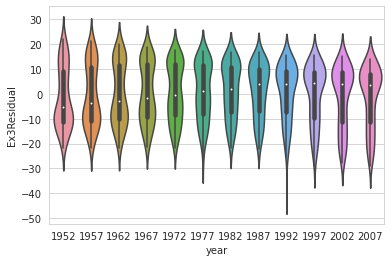

In [385]:
sns.violinplot(x='year', y='Ex3Residual',data=data, title='Exercise 3: Violin Plot using Seaborn via statsmodel')

In [386]:
years2 = []
for index, row in dataset.iterrows():
    if row[2] not in years2:
        years2.append(row[2])
    else:
        pass

In [387]:
expectancies2 = []

for yr in years2:
    temp = []
    for index, row in data.iterrows():
        if yr == row[2]:
            temp.append(row[6])
        else:
            pass
    expectancies2.append(temp)

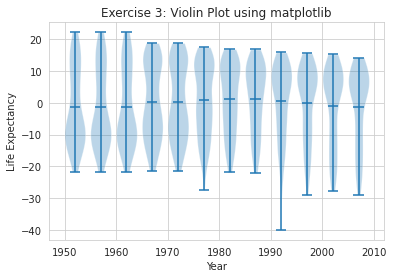

In [388]:
fig, ax = plt.subplots()

ax.violinplot(expectancies2,years2,widths=4,showmeans=True) #look like labels

ax.set_title('Exercise 3: Violin Plot using matplotlib')
ax.set_xlabel("Year")
ax.set_ylabel("Life Expectancy")
#fig.savefig("violin.png")
plt.show()


<AxesSubplot:xlabel='year', ylabel='Residual'>

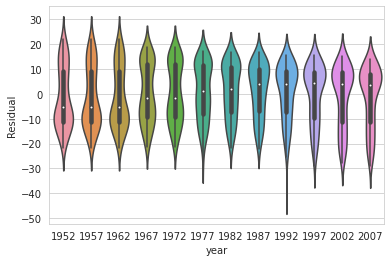

In [389]:
sns.violinplot(x='year', y='Residual',data=data, title='Exercise 3: Violin Plot using Seaborn')

#### Question 8: Does the plot of Exercise 3 match your expectations (as you answered Question 4)?

In [390]:
#I believe yes the plots do match to our expectations along with Question 4 to a certain exientas it seems to give us a 
#linear or can say kind of positive relation.
#It is so because we plot with respect with years and life expectancies in terms of residuals and we see a positive relationship in both the plots and 
#intuition that we made above.
#Further, also in exercise 2 we did make plots for our regression model that we tried to fit to check if our inituitive statement that we
#made has a relation or not and we see that those plots do look mostly similar with linear relationship and positive relationship.

#### Exercise 4: Make a boxplot (or violin plot) of model residuals vs. continent.

<AxesSubplot:title={'center':'Residual'}, xlabel='continent'>

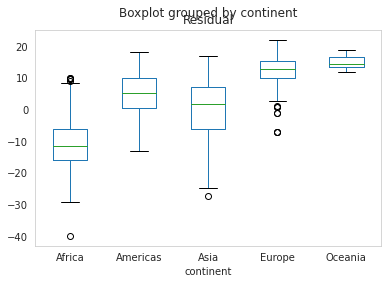

In [391]:
data.boxplot(by ='continent', column =['Residual'], grid = False)

<AxesSubplot:xlabel='continent', ylabel='Residual'>

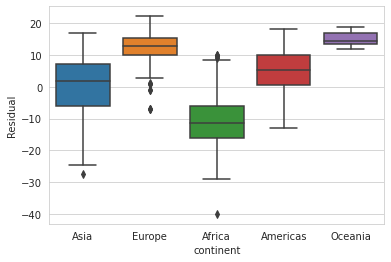

In [392]:
#box plot using seaborn
sns.set_style("whitegrid")  
sns.boxplot(x = 'continent', y = 'Residual', data = data)

<AxesSubplot:xlabel='continent', ylabel='Residual'>

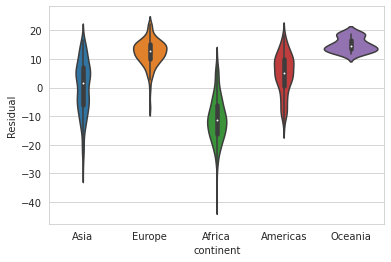

In [393]:
sns.violinplot(x='continent', y='Residual',data=data, title='Exercise 4: Violin Plot using Seaborn')

In [394]:
continents = []
for index, row in data.iterrows():
    if row[1] not in continents:
        continents.append(row[1])
    else:
        pass

In [395]:
residuals = []

for cn in continents:
    temp = []
    for index, row in data.iterrows():
        if cn == row[1]:
            temp.append(row[6])
        else:
            pass
    residuals.append(temp)

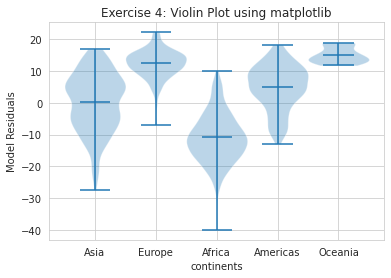

In [396]:
fig, ax = plt.subplots()

ax.violinplot(residuals,[4, 8, 12, 16, 20],widths=4,showmeans=True) #look like labels
ax.set_xticks([4, 8, 12, 16, 20])
ax.set_xticklabels(continents)
ax.set_title('Exercise 4: Violin Plot using matplotlib')
ax.set_xlabel("continents")
ax.set_ylabel("Model Residuals")
#fig.savefig("violin.png")
plt.show()


#### Question 9: Is there a dependence between model residual and continent? If so, what would that suggest when performing a regression analysis of life expectancy across time?

In [397]:
#I believe yes there is a dependence between model residual and continent. It is because we see that for all different continents we have
#there is variantions and differences in the points of them as we can see the violin plot as well as box plot which also tells us that 
#they have different statistical values for different continents with respect to the residuals across time or year.

#### Exercise 5: As in the Moneyball project, make a scatter plot of life expectancy vs. year, grouped by continent, and add a regression line.

In [398]:
forAsia = []
for index, row in dataset.iterrows():
    if 'Asia' == row[1]:
        forAsia.append(row)
    else:
        pass
forAsia = pd.DataFrame(forAsia)

In [399]:
forEurope = []
for index, row in dataset.iterrows():
    if 'Europe' == row[1]:
        forEurope.append(row)
    else:
        pass
forEurope = pd.DataFrame(forEurope)

In [400]:
forAfrica = []
for index, row in dataset.iterrows():
    if 'Africa' == row[1]:
        forAfrica.append(row)
    else:
        pass
forAfrica = pd.DataFrame(forAfrica)

In [401]:
forAmericas = []
for index, row in dataset.iterrows():
    if 'Americas' == row[1]:
        forAmericas.append(row)
    else:
        pass
forAmericas = pd.DataFrame(forAmericas)

In [402]:
forOceania = []
for index, row in dataset.iterrows():
    if 'Oceania' == row[1]:
        forOceania.append(row)
    else:
        pass
forOceania = pd.DataFrame(forOceania)

Text(0.5, 1.0, 'Plot for Oceania as a continent with respect to years and life expectancies along with a regression line')

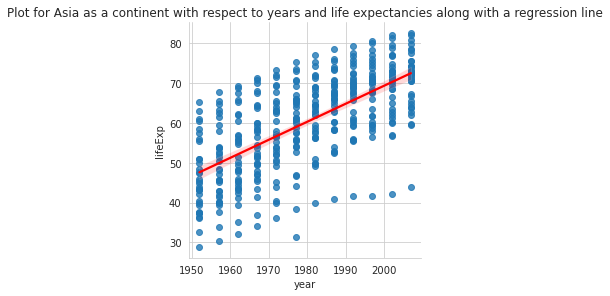

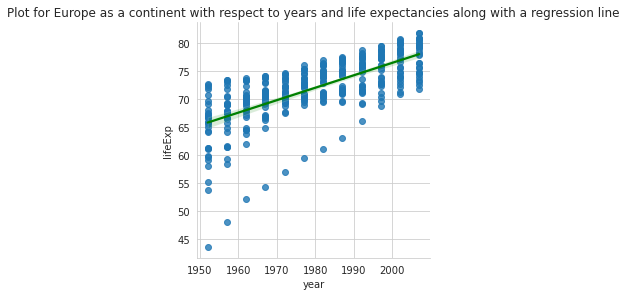

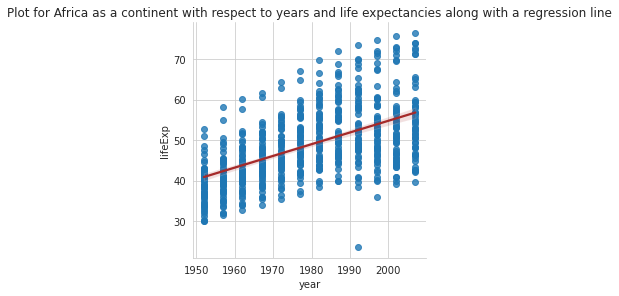

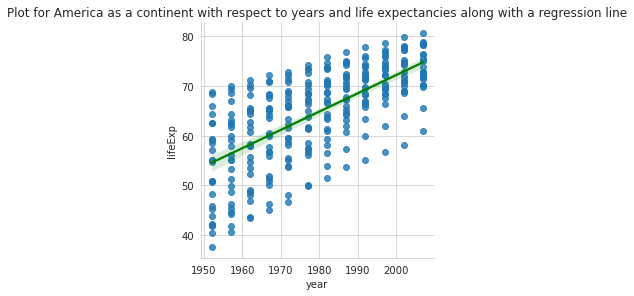

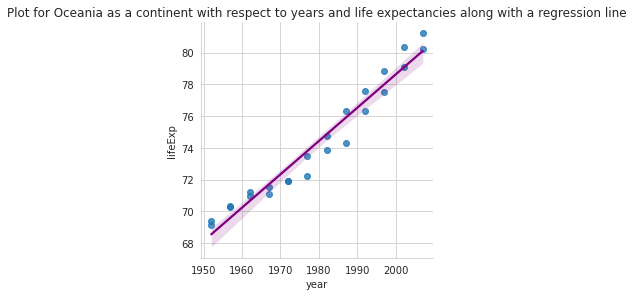

In [403]:
sns.lmplot(x='year',y='lifeExp',data=forAsia,fit_reg=True,height=4,line_kws={'color': 'red'})
ax = plt.gca()
ax.set_title("Plot for Asia as a continent with respect to years and life expectancies along with a regression line")
sns.lmplot(x='year',y='lifeExp',data=forEurope,fit_reg=True,height=4,line_kws={'color': 'green'}) 
ax = plt.gca()
ax.set_title("Plot for Europe as a continent with respect to years and life expectancies along with a regression line")
sns.lmplot(x='year',y='lifeExp',data=forAfrica,fit_reg=True,height=4,line_kws={'color': 'brown'})
ax = plt.gca()
ax.set_title("Plot for Africa as a continent with respect to years and life expectancies along with a regression line")
sns.lmplot(x='year',y='lifeExp',data=forAmericas,fit_reg=True,height=4,line_kws={'color': 'green'}) 
ax = plt.gca()
ax.set_title("Plot for America as a continent with respect to years and life expectancies along with a regression line")
sns.lmplot(x='year',y='lifeExp',data=forOceania,fit_reg=True,height=4,line_kws={'color': 'purple'}) 
ax = plt.gca()
ax.set_title("Plot for Oceania as a continent with respect to years and life expectancies along with a regression line")

Text(0.5, 1.0, 'Plot for all continents with respect to years and life expectancies along with a regression line')

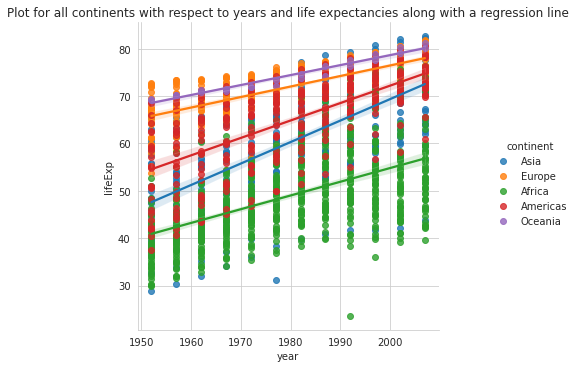

In [404]:
sns.lmplot(x="year",y="lifeExp",hue="continent",data=data)
ax = plt.gca()
ax.set_title("Plot for all continents with respect to years and life expectancies along with a regression line")

#### Question 10: Based on this plot, should your regression model include an interaction term for continent and year? Why?

In [405]:
#I believe,yes the regression model should include interaction term for continent and year because every continnet has a little 
#different relation and interations with different linear regression line for all the five continents. 
#Therefore, all the five continents with different regression lines have some different relationship and differences.

#### Exercise 6: Fit a linear regression model for life expectancy including a term for an interaction between continent and year. Print out the model in a readable format, e.g., print the coefficients of the model (no need to plot). 

In [406]:
model = smf.ols(formula='lifeExp ~ year*continent', data=data).fit()

In [407]:
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Sat, 26 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:06:45   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -524.2578     32.963    -15.904      0.000    -588.911    -459.605
continent[T.Americas]       -138.8484     57.851     -2.400      0.016    -252.315     -25.382
continent[T.Asia]           -312.6330     52.904     -5.909      0.000    -416.396    -208.870
continent[T.Europe]          156.8469     54.498      2.878      0.004      49.957     263.737
continent[T.Oceania]         182.3499    171.283      1.065      0.287    -153.599     518.298
year                           0.2895      0.017     17.387      0.000       0.257       0.322
year:continent[T.Americas]     0.0781      0.029      2.673      0.008       0.021       0.135
year:continent[T.Asia]         0.1636      0.027      6.121      0.000       0.111       0.216
year:continent[T.Europe]      -0.0676      0.028     -2.455      0.014      -0.122      -0.014
year:continent[T.Oceania]     -0.0793      0.087     -0.916      0.360      -0.249       0.090
==============================================================================
Omnibus:                       27.121   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.106
Skew:                          -0.121   Prob(JB):                     2.65e-10
Kurtosis:                       3.750   Cond. No.                     2.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Question 11: Are all parameters in the model significantly (in the p-value sense) different from zero? If not, which are not significantly different from zero? 

In [408]:
#I believe the p-values that we get from our regression model fit are 0, 0.016, 0, 0.004, 0.287 which first four are less than our p-value
#threshbold which is 0.05 which means that they are significant but with p-value 0.287 which is or Oceania is greater than our threshold
#which might be not significant.

#### Question 12: On average, by how much does life expectancy increase each year for each continent? 

In [409]:
#I believe : according to fitting the linear regression model; we have: lifeExp = a . year + b . continent + c - year * continent
#It increases by 0.2895 which is just the coefficient that we computed above via our fitting a regression model.

#### Exercise 7: Make a residuals vs. year violin plot for the interaction model. Comment on how well it matches assumptions of the linear regression model.

In [410]:
newpredict = model.predict(data.loc[:,['year', 'continent']])

In [411]:
data['newpredictex7'] = newpredict

In [412]:
data['Ex7Residual'] = data['lifeExp'] - data['newpredictex7']

In [413]:
data.head()

,country,continent,year,lifeExp,pop,gdpPercap,Residual,newpredictex3,Ex3Residual,newpredictex7,Ex7Residual
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,-21.711084,50.512084,-21.711084,47.604037,-18.803037
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,-21.711084,52.141603,-21.809603,49.869649,-19.537649
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,-21.711084,53.771122,-21.774122,52.135261,-20.138261
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,-21.380642,55.400642,-21.380642,54.400873,-20.380873
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,-21.380642,57.030161,-20.942161,56.666485,-20.578485


<AxesSubplot:xlabel='year', ylabel='Ex7Residual'>

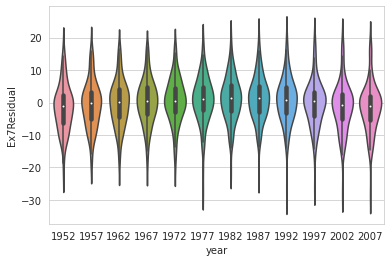

In [414]:
sns.violinplot(x='year', y='Ex7Residual',data=data, title='Exercise 7: Violin Plot using Seaborn')

Text(0.5, 1.0, 'Plot respect to years and life expectancies along with a regression line')

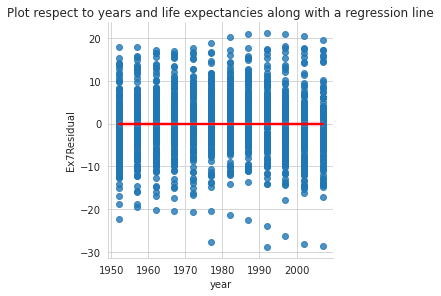

In [415]:
sns.lmplot(x='year',y='Ex7Residual',data=data,fit_reg=True,height=4,line_kws={'color': 'red'}) 
ax = plt.gca()
ax.set_title("Plot respect to years and life expectancies along with a regression line")

In [416]:
#I believe it matches the assumptions of our linear regression model with one of the its assumptions being linear relationship.
#I believe so because we do see a relationship with our residuals over year for five different continents.
#Referencing our scatter plot that we get after fitting the linear regression model as well, we see a kind of constant regression line.
#Therefore we can say one of the assumptions as Linear Relationship does come into teh picture from our linear regression model.

# Part 2: Classification

In [417]:
#datapart2 = pd.read_fwf("housing.data", names=["Crime_Rate_Per_Town", "Land_Zoned", "Non_Retail_Business","Charles_River_DV","Nitric_Oxides","Avg_No_Rooms","Owner_Occupied_Units","Weighted_Distances","Accessibility_Index","Property_tax","Pupil_teacher","Black_People","Lower_Status_pop","Median_Value_Owner_Occupied"])
#datapart2.head()

In [418]:
boston=load_boston()
datapart2=pd.DataFrame(boston.data)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [419]:
datapart2.columns=boston.feature_names
datapart2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [420]:
datapart2['House_Price']=boston.target
datapart2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [421]:
#I chose Boston House Prices as dataset for part 2 of the project. I believe I found it interesting in the sense of all values are numerical so as a 
#process we do not have to convert categorical data to numerical data and we can starting building or fitting our model and make analysis.

In [422]:
datapart2.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [423]:
datapart2.shape

(506, 14)

In [424]:
datapart2.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'House_Price'],
      dtype='object')

#### Support Vector Machine

In [425]:
#Spliting the dataset
X = datapart2.drop(['House_Price'], axis=1)
feature_df = datapart2[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

# X is our independet variable which has everything expect price
X = np.asarray(feature_df)

# Y is our dependenet variable which has nothing but only price column
Y = np.asarray(datapart2['House_Price'])

In [426]:
X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(X,Y, test_size=0.2, random_state=4)

In [427]:
print(X_trainset.shape)
print(Y_trainset.shape)
print(X_testset.shape)
print(Y_testset.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [428]:
## modeling

In [429]:
sc = StandardScaler()
# Fitting the x-training set
X_trainset = sc.fit_transform(X_trainset)
# Fitting the y-training set
X_testset = sc.fit_transform(X_testset)

In [430]:
regress = svm.SVR()

In [431]:
# Fitting the X training and Y training set
regress.fit(X_trainset,Y_trainset)

SVR()

In [432]:
Y_prediction = regress.predict(X_trainset) #Predicting Y for our X training set

In [433]:
# Evaluating the model
R_squared = metrics.r2_score(Y_trainset, Y_prediction)
print("R_squared: ",R_squared)

Adjusted_R_squared = 1-(1-metrics.r2_score(Y_trainset, Y_prediction))*(len(Y_trainset)-1)/(len(Y_trainset)-X_trainset.shape[1]-1)
print("Adjusted_R_squared: ",Adjusted_R_squared)

Mean_Absolute_Error = metrics.mean_absolute_error(Y_trainset, Y_prediction)
print("Mean_Absolute_Error: ",Mean_Absolute_Error)

Mean_Squared_Error = metrics.mean_squared_error(Y_trainset, Y_prediction)
print("Mean_Squared_Error: ",Mean_Squared_Error)

Root_Mean_Squared_Error = np.sqrt(metrics.mean_squared_error(Y_trainset, Y_prediction))
print("Root_Mean_Squared_Error: ",Root_Mean_Squared_Error)

R_squared:  0.6687738915196942
Adjusted_R_squared:  0.6577330212370174
Mean_Absolute_Error:  2.969051371984148
Mean_Squared_Error:  27.163286454119653
Root_Mean_Squared_Error:  5.211840985114535


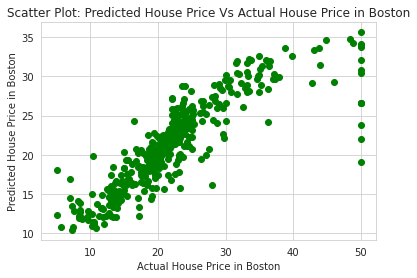

In [434]:
plt.scatter(Y_trainset, Y_prediction, color='green')
plt.xlabel("Actual House Price in Boston")
plt.ylabel("Predicted House Price in Boston")
plt.title("Scatter Plot: Predicted House Price Vs Actual House Price in Boston")
plt.show()

In [435]:
## Testing set

In [436]:
Y_PredictionTest=regress.predict(X_testset)

In [437]:
# Evaluating the model
R_squared = metrics.r2_score(Y_testset, Y_PredictionTest)
print("R_squared: ",R_squared)

Adjusted_R_squared = 1-(1-metrics.r2_score(Y_testset, Y_PredictionTest))*(len(Y_testset)-1)/(len(Y_testset)-X_testset.shape[1]-1)
print("Adjusted_R_squared: ",Adjusted_R_squared)

Mean_Absolute_Error = metrics.mean_absolute_error(Y_testset, Y_PredictionTest)
print("Mean_Absolute_Error: ",Mean_Absolute_Error)

Mean_Squared_Error = metrics.mean_squared_error(Y_testset, Y_PredictionTest)
print("Mean_Squared_Error: ",Mean_Squared_Error)

Root_Mean_Squared_Error = np.sqrt(metrics.mean_squared_error(Y_testset, Y_PredictionTest))
print("Root_Mean_Squared_Error: ",Root_Mean_Squared_Error)

R_squared:  0.6155481349219498
Adjusted_R_squared:  0.558754109399056
Mean_Absolute_Error:  3.3553503280826917
Mean_Squared_Error:  35.71143554193368
Root_Mean_Squared_Error:  5.9759045793865955


In [438]:
#print(classification_report(Y_testset, Y_PredictionTest))
regress.score(X_testset,Y_testset)

0.6155481349219498

In [439]:
##Holdout Validation
result = regress.score(X_testset, Y_testset)
print("Accuracy using Hold-out Validation: %.2f%%" % (result*100.0))

Accuracy using Hold-out Validation: 61.55%


In [440]:
cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(Y_PredictionTest)    # initialise a matrix full with zeros
y_pred_classes[Y_PredictionTest > cutoff] = 1       # add a 1 if the cutoff was breached

y_test_classes = np.zeros_like(Y_PredictionTest)
y_test_classes[Y_testset > cutoff] = 1

confusion_matrix(y_test_classes, y_pred_classes)

array([[102]])

In [441]:
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)

#view mean absolute error
print("MAE using cross-validation: ",np.mean(np.absolute(scores)))

scores1 = cross_val_score(model, X, Y, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)

#view RMSE
print("RMAE using cross-validation: ",np.sqrt(np.mean(np.absolute(scores1))))

MAE using cross-validation:  3.3913869314894862
RMAE using cross-validation:  4.874334412006746


#### Correlation matrix using heatmap

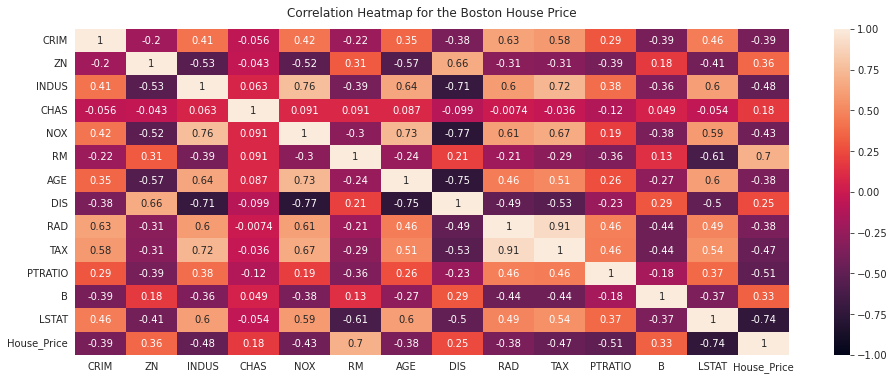

In [442]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(datapart2.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap for the Boston House Price', fontdict={'fontsize':12}, pad=12);

#### Random Forest

In [443]:
datapart2['House_Price']=datapart2['House_Price'].astype('int')

X = datapart2.drop(['House_Price'], axis=1)
feature_df = datapart2[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']]

# X is our independet variable which has everything expect price
X = np.asarray(feature_df)

# Y is our dependenet variable which has nothing but only price column
y = np.asarray(datapart2['House_Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [444]:
regression=RandomForestRegressor()
regression.fit(X_train, y_train)

#prediction
y_predect=regression.predict(X_train)

In [445]:
# Evaluating the model
R_squared = metrics.r2_score(y_train, y_predect)
print("R_squared: ",R_squared)

Adjusted_R_squared = 1-(1-metrics.r2_score(y_train, y_predect))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("Adjusted_R_squared: ",Adjusted_R_squared)

Mean_Absolute_Error = metrics.mean_absolute_error(y_train, y_predect)
print("Mean_Absolute_Error: ",Mean_Absolute_Error)

Mean_Squared_Error = metrics.mean_squared_error(y_train, y_predect)
print("Mean_Squared_Error: ",Mean_Squared_Error)

Root_Mean_Squared_Error = np.sqrt(metrics.mean_squared_error(y_train, y_predect))
print("Root_Mean_Squared_Error: ",Root_Mean_Squared_Error)

R_squared:  0.9773617613863388
Adjusted_R_squared:  0.9764562318417923
Mean_Absolute_Error:  0.8929498525073747
Mean_Squared_Error:  1.8842946902654867
Root_Mean_Squared_Error:  1.3726961390874117


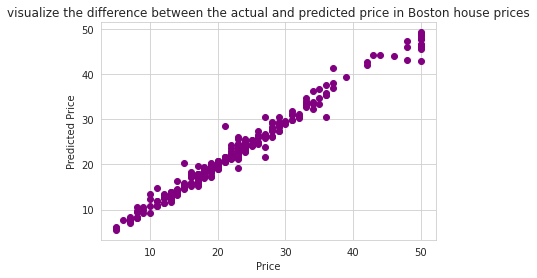

In [446]:
plt.scatter(y_train, y_predect, color="purple")
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("visualize the difference between the actual and predicted price in Boston house prices")
plt.show()

In [447]:
# Predicting the Test data with model 
y_test_predect=regression.predict(X_test)

In [448]:
# Evaluating the model
R_squared = metrics.r2_score(y_test, y_test_predect)
print("R_squared: ",R_squared)

Adjusted_R_squared = 1-(1-metrics.r2_score(y_test, y_test_predect))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted_R_squared: ",Adjusted_R_squared)

Mean_Absolute_Error = metrics.mean_absolute_error(y_test, y_test_predect)
print("Mean_Absolute_Error: ",Mean_Absolute_Error)

Mean_Squared_Error = metrics.mean_squared_error(y_test, y_test_predect)
print("Mean_Squared_Error: ",Mean_Squared_Error)

Root_Mean_Squared_Error = np.sqrt(metrics.mean_squared_error(y_test, y_test_predect))
print("Root_Mean_Squared_Error: ",Root_Mean_Squared_Error)

R_squared:  0.8897342836278463
Adjusted_R_squared:  0.8803653011909967
Mean_Absolute_Error:  2.217664670658683
Mean_Squared_Error:  9.83758862275449
Root_Mean_Squared_Error:  3.136493045226546


In [449]:
#print(classification_report(Y_testset, Y_PredictionTest))
regression.score(X_test,y_test)

0.8897342836278463

In [450]:
##Holdout Validation
result = regression.score(X_test, y_test)
print("Accuracy using Hold-out Validation: %.2f%%" % (result*100.0))

Accuracy using Hold-out Validation: 88.97%


In [451]:
cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(y_test_predect)    # initialise a matrix full with zeros
y_pred_classes[y_test_predect > cutoff] = 1       # add a 1 if the cutoff was breached

y_test_classes = np.zeros_like(y_test_predect)
y_test_classes[y_test > cutoff] = 1

confusion_matrix(y_test_classes, y_pred_classes)

array([[167]])

In [452]:
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)

#view mean absolute error
print("MAE using cross-validation: ",np.mean(np.absolute(scores)))

scores1 = cross_val_score(model, X, y, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)

#view RMSE
print("RMAE using cross-validation: ",np.sqrt(np.mean(np.absolute(scores1))))

MAE using cross-validation:  3.4039353750530124
RMAE using cross-validation:  4.912815395934024


##### Comparisons from above

In [453]:
#Accuracy using Holdout validation for Support Vector Machine is 61.55%.
#Accuracy using Holdout validation for Random Forest is 89.19%.
#This percentage that we computed after fitting the gives us an highlight that the Random Forest operation tends to give us high accuracy compared to
#support vector machine.
#Further we also computed the R-squared, Adjusted R-squared, mean absolute error, mean squared error, root mean squared error for both support
#vector machine and random forest for the training set as well as test sets that use and derive.
#Also, we used Cross-validtaion method and computed mean absolute error and root mean squared error for both classification algorithms.
#With the K-fold validation computation; 
#Support Vector Machine: MAE is 3.391 and RMSE is 4.874.
#Random Forest: MAE is 3.403 and RMSE is 4.912.
#The difference does not seems to be much high but we can intuitively say that MAE is slightly more for SVM whereas RMSE is a little more for 
#Random Forest.
#However, analyzing our Accuracy we see than Random Forest has pretty good accuracy along which tells us has a goof performace rating with relation to
#training set and testing set, therefore we can say there is high chances of getting correct predictions and also no overfitting.